<a href="https://www.kaggle.com/code/maheswarareddyp/classification-pytorch-creditcardfraud?scriptVersionId=137977344" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.7 MB/s eta 0:00:00


In [3]:
data = pd.read_excel("/kaggle/input/default-creditcardclients/default of credit card clients.xls", skiprows = 1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data_clean = data.drop(columns=["ID", "SEX"])
data_clean.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
total = data_clean.isnull().sum()
percent = (data_clean.isnull().sum()/data_clean.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
outliers = {}
for i in range(data_clean.shape[1]):
    min_t = data_clean[data_clean.columns[i]].mean() - (3 * data_clean[data_clean.columns[i]].std())
    max_t = data_clean[data_clean.columns[i]].mean() + (3 * data_clean[data_clean.columns[i]].std())
    count = 0
    for j in data_clean[data_clean.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
        percentage = count/data_clean.shape[0]
    outliers[data_clean.columns[i]] = "%.3f" % percentage
print(outliers)

{'LIMIT_BAL': '0.004', 'EDUCATION': '0.011', 'MARRIAGE': '0.000', 'AGE': '0.005', 'PAY_0': '0.005', 'PAY_2': '0.005', 'PAY_3': '0.005', 'PAY_4': '0.006', 'PAY_5': '0.005', 'PAY_6': '0.004', 'BILL_AMT1': '0.023', 'BILL_AMT2': '0.022', 'BILL_AMT3': '0.022', 'BILL_AMT4': '0.023', 'BILL_AMT5': '0.022', 'BILL_AMT6': '0.022', 'PAY_AMT1': '0.013', 'PAY_AMT2': '0.010', 'PAY_AMT3': '0.012', 'PAY_AMT4': '0.013', 'PAY_AMT5': '0.014', 'PAY_AMT6': '0.015', 'default payment next month': '0.000'}


In [7]:
target = data_clean["default payment next month"]
yes = target[target == 1].count()
no = target[target == 0].count()
print("yes %: " + str(yes/len(target)*100) + " - no %: " + str(no/len(target)*100))

yes %: 22.12 - no %: 77.88000000000001


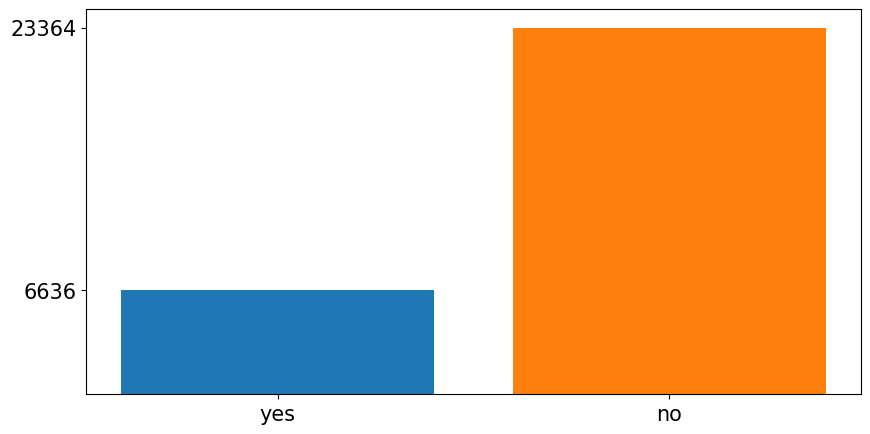

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
plt.bar("yes", yes)
plt.bar("no", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()